In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [245]:
df=pd.read_csv("February_weather.csv")


In [246]:
df1=pd.read_csv("Weather_data.csv")

In [247]:
df.head(5)

,ID,Timestamp,Temperature,Humidity,Date,Time,Day,Month,Year,Hour
0,1,2014-02-20T19:26:37,29.4,73,20-02-2014,19:26:37,20,2,2014,19
1,2,2014-02-20T19:30:53,30.1,61,20-02-2014,19:30:53,20,2,2014,19
2,3,2014-02-20T19:32:36,30.4,59,20-02-2014,19:32:36,20,2,2014,19
3,4,2014-02-20T19:41:47,30.4,49,20-02-2014,19:41:47,20,2,2014,19
4,5,2014-02-20T19:45:12,30.0,57,20-02-2014,19:45:12,20,2,2014,19


In [248]:
df.drop("Timestamp",inplace=True,axis=1)

In [249]:
df.head()

,ID,Temperature,Humidity,Date,Time,Day,Month,Year,Hour
0,1,29.4,73,20-02-2014,19:26:37,20,2,2014,19
1,2,30.1,61,20-02-2014,19:30:53,20,2,2014,19
2,3,30.4,59,20-02-2014,19:32:36,20,2,2014,19
3,4,30.4,49,20-02-2014,19:41:47,20,2,2014,19
4,5,30.0,57,20-02-2014,19:45:12,20,2,2014,19


In [250]:
#df.rename(columns={"_id":"ID"},inplace=True)

In [251]:
df.set_index("ID")

,Temperature,Humidity,Date,Time,Day,Month,Year,Hour
ID,,,,,,,,
1,29.4,73,20-02-2014,19:26:37,20,2,2014,19
2,30.1,61,20-02-2014,19:30:53,20,2,2014,19
3,30.4,59,20-02-2014,19:32:36,20,2,2014,19
4,30.4,49,20-02-2014,19:41:47,20,2,2014,19
5,30.0,57,20-02-2014,19:45:12,20,2,2014,19
...,...,...,...,...,...,...,...,...
5214,23.4,80,30-09-2014,23:36:26,30,9,2014,23
5215,23.4,80,30-09-2014,23:41:34,30,9,2014,23
5216,23.4,80,30-09-2014,23:45:51,30,9,2014,23


In [252]:
#df.rename(columns={"Time":"Date"},inplace=True)

In [253]:
df.tail(89)

,ID,Temperature,Humidity,Date,Time,Day,Month,Year,Hour
34740,5130,26.3,76,30-09-2014,15:46:35,30,9,2014,15
34741,5131,26.3,77,30-09-2014,15:51:41,30,9,2014,15
34742,5132,26.3,76,30-09-2014,15:56:49,30,9,2014,15
34743,5133,26.3,76,30-09-2014,16:01:58,30,9,2014,16
34744,5134,26.3,74,30-09-2014,16:07:05,30,9,2014,16
...,...,...,...,...,...,...,...,...,...
34824,5214,23.4,80,30-09-2014,23:36:26,30,9,2014,23
34825,5215,23.4,80,30-09-2014,23:41:34,30,9,2014,23
34826,5216,23.4,80,30-09-2014,23:45:51,30,9,2014,23
34827,5217,23.4,80,30-09-2014,23:50:59,30,9,2014,23


In [254]:
df.head()

,ID,Temperature,Humidity,Date,Time,Day,Month,Year,Hour
0,1,29.4,73,20-02-2014,19:26:37,20,2,2014,19
1,2,30.1,61,20-02-2014,19:30:53,20,2,2014,19
2,3,30.4,59,20-02-2014,19:32:36,20,2,2014,19
3,4,30.4,49,20-02-2014,19:41:47,20,2,2014,19
4,5,30.0,57,20-02-2014,19:45:12,20,2,2014,19


In [255]:
df["Date"]=pd.to_datetime(df["Date"])

c:\Users\25bak\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\25bak\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\25bak\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\25bak\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-02-2014' in DD/MM/YYYY format. Provide format or specif

In [256]:
df["Date"]=pd.to_datetime(df["Date"])

In [257]:
df.sample(34)

,ID,Temperature,Humidity,Date,Time,Day,Month,Year,Hour
16622,5552,25.5,61,2014-04-23,07:14:30,23,4,2014,7
29727,117,23.3,80,2014-01-09,10:12:41,1,9,2014,10
16704,5634,31.0,31,2014-04-23,14:09:44,23,4,2014,14
20674,911,27.2,65,2014-04-05,10:08:27,4,5,2014,10
32369,2759,26.3,57,2014-10-09,18:29:42,10,9,2014,18
11089,19,27.1,37,2014-01-04,01:29:56,1,4,2014,1
15539,4469,28.3,56,2014-04-19,11:10:52,19,4,2014,11
27628,6839,22.7,81,2014-07-25,01:31:57,25,7,2014,1
10528,8222,26.4,40,2014-03-30,01:53:22,30,3,2014,1
15408,4338,26.7,58,2014-04-19,00:07:50,19,4,2014,0


In [258]:
#df["DayTime"]=pd.to_datetime(df["DayTime"])

In [259]:
#df["DayTime"]=df1["DayTime"]

In [260]:
#X=df[["DayTime","Date"]]
X=df[["Day","Month","Year","Hour"]]
Y=df[["Temperature","Humidity"]]

In [261]:
#X["Date"]=X["Date"].dt.dayofyear

In [262]:
#X["DayTime"]=X["DayTime"].dt.hour

In [263]:
X

,Day,Month,Year,Hour
0,20,2,2014,19
1,20,2,2014,19
2,20,2,2014,19
3,20,2,2014,19
4,20,2,2014,19
...,...,...,...,...
34824,30,9,2014,23
34825,30,9,2014,23
34826,30,9,2014,23
34827,30,9,2014,23


In [264]:
X


,Day,Month,Year,Hour
0,20,2,2014,19
1,20,2,2014,19
2,20,2,2014,19
3,20,2,2014,19
4,20,2,2014,19
...,...,...,...,...
34824,30,9,2014,23
34825,30,9,2014,23
34826,30,9,2014,23
34827,30,9,2014,23


In [265]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [266]:
model=LinearRegression()

In [267]:
model.fit(X_train,Y_train)

LinearRegression()

In [268]:
Y_pred=model.predict(X_test)

In [269]:
mean_error=mean_squared_error(Y_test,Y_pred)

In [270]:
score=model.score(X_test,Y_test)

In [271]:
print(score)

0.40493259026904027


In [272]:
print("Mean squared error is ",mean_error)

Mean squared error is  86.27189716771888


In [273]:
DayInput=input("Enter the day")

In [274]:
HourInput=input("Enter the Hour")

In [275]:
MonthInput=input("Enter the month")

In [276]:
Year_Input=input("Enter the Year")

In [277]:
Input=pd.DataFrame({"Day":[DayInput],"Month":[MonthInput],"Year":[Year_Input],"Hour":[HourInput]})

In [278]:
predict=model.predict(Input)

In [279]:
print(f"The temperature and humidity of the day {DayInput} of {MonthInput} and {HourInput} is ")

The temperature and humidity of the day 25 of 3 and 6 is 


In [280]:
print("Temp Predict: ",predict[0][0])

Temp Predict:  25.850857779441668


In [281]:
print("Humidity predict: ",predict[0][1])

Humidity predict:  54.01307359896204


In [282]:
predict

array([[25.85085778, 54.0130736 ]])

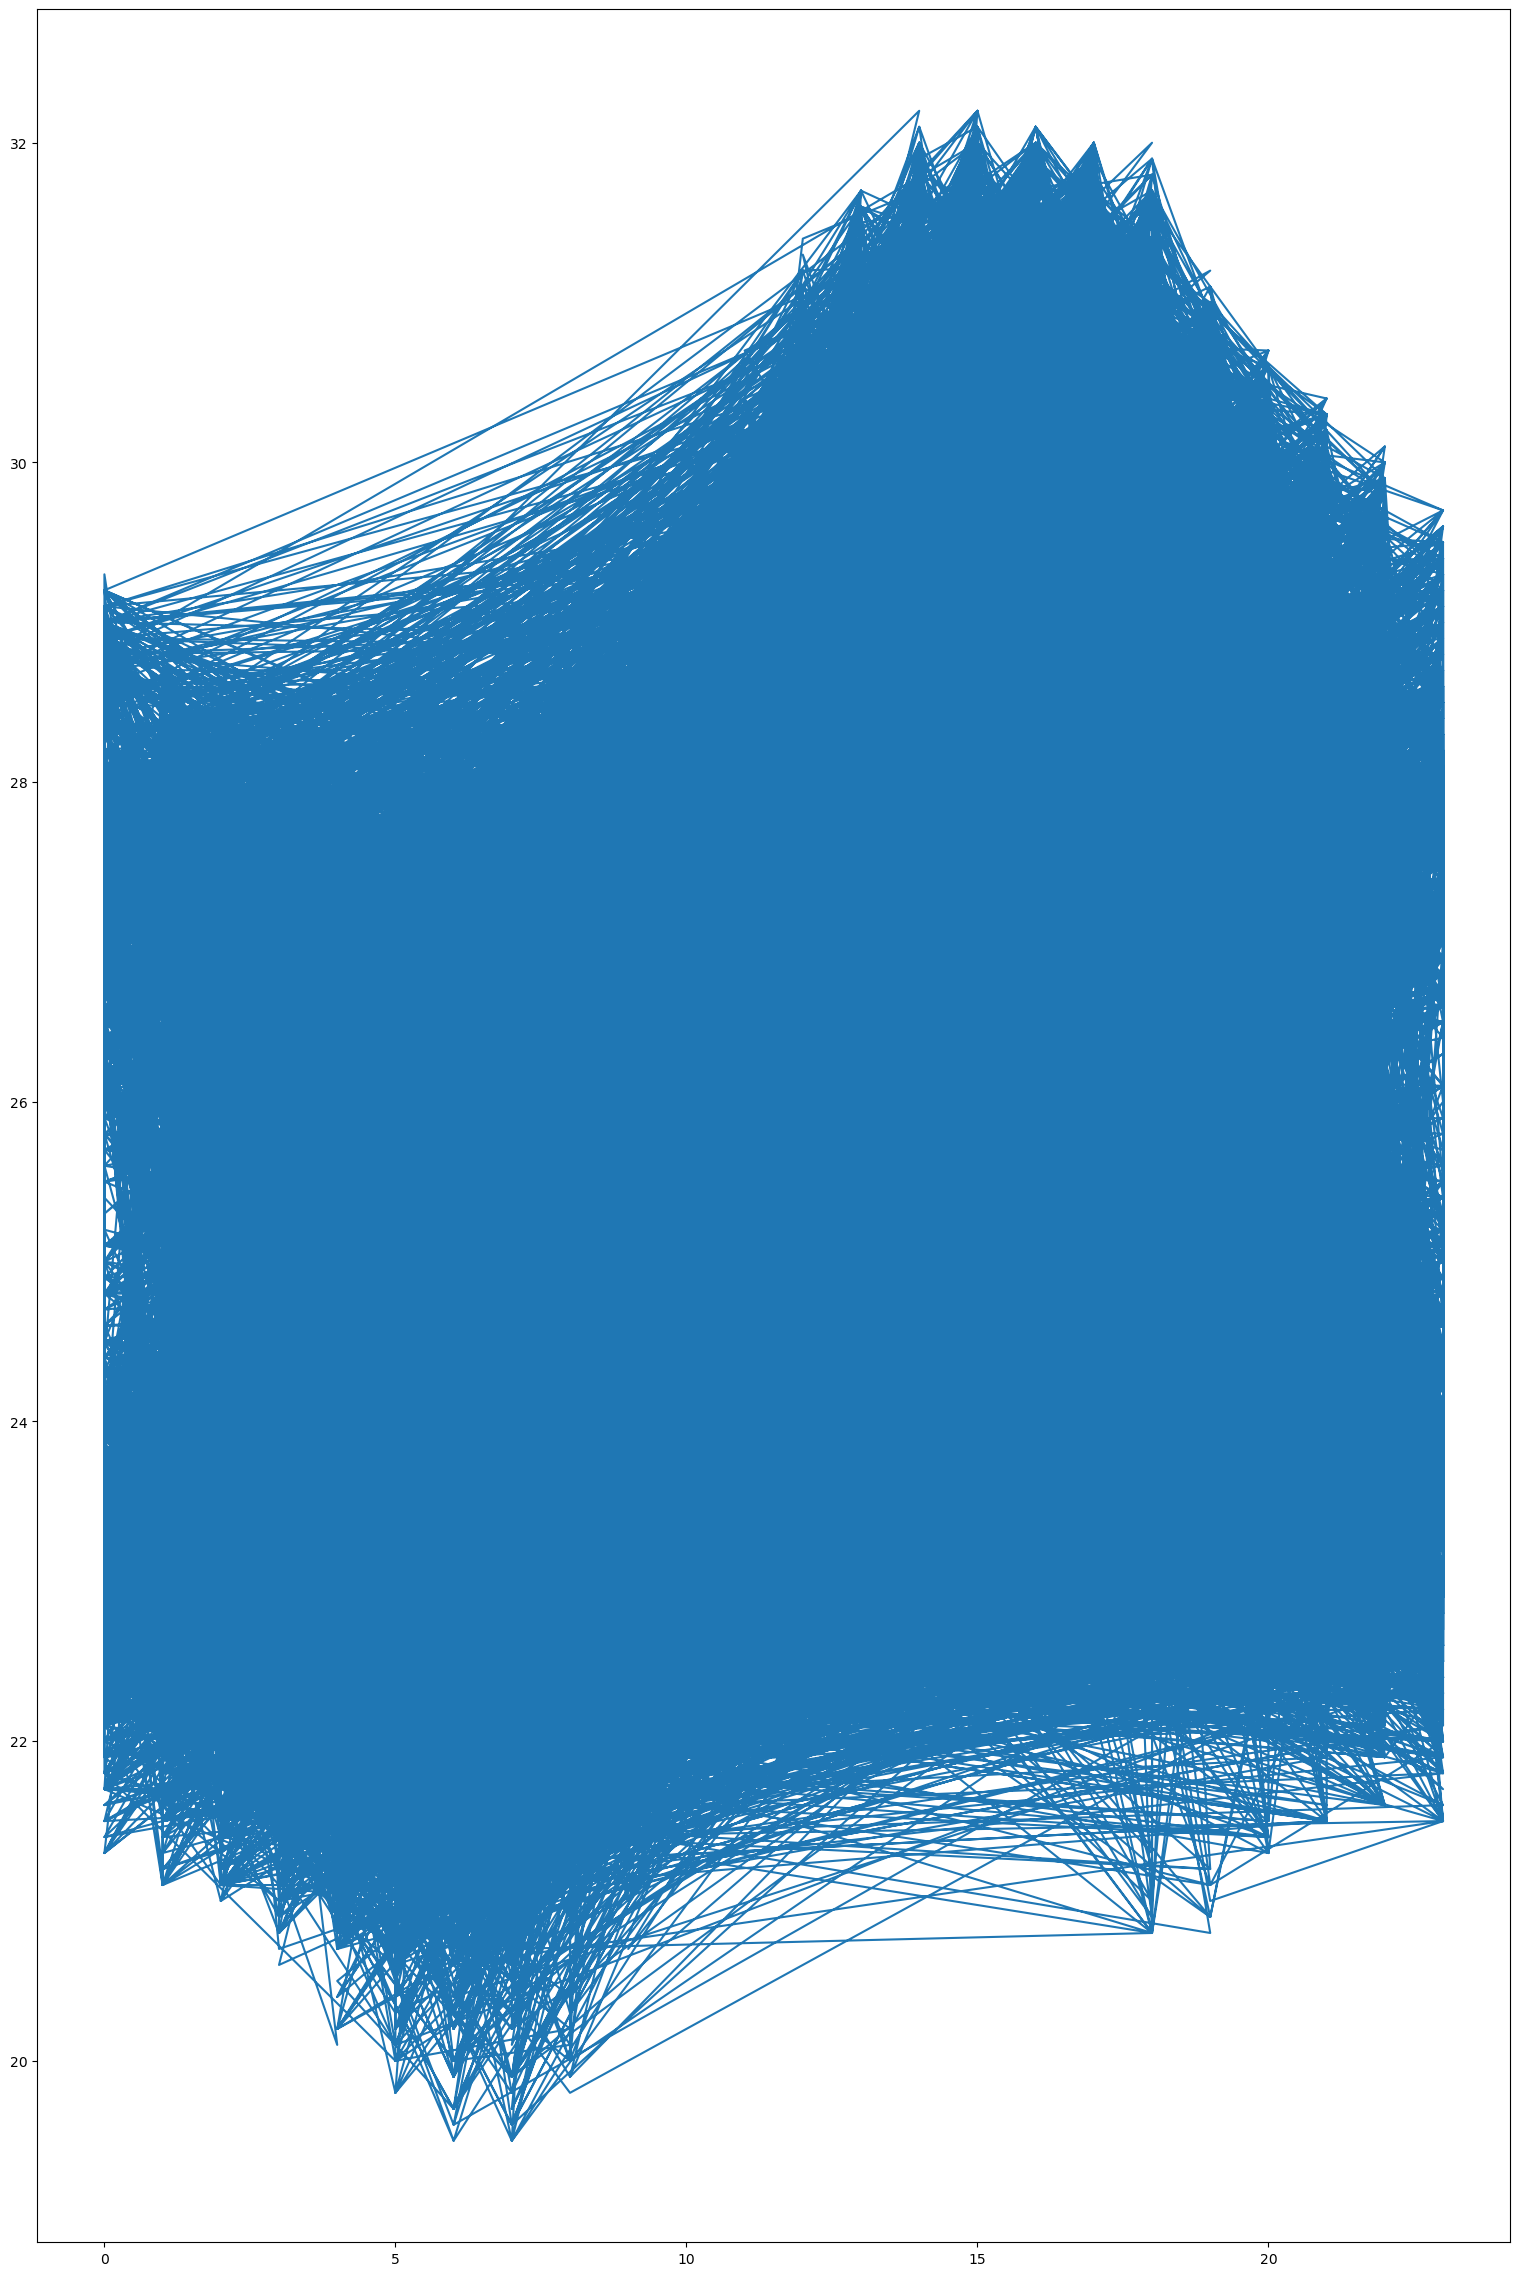

In [283]:
plt.figure(figsize=(19,29))
plt.plot(X_train["Hour"],Y_train["Temperature"])
plt.show()

In [284]:
#X_train["Date"].to_csv("Dateformat.csv")

In [285]:
randf=RandomForestRegressor()

In [286]:
randf.fit(X_train,Y_train)

RandomForestRegressor()

In [287]:
prediction=randf.predict(X_test)

In [288]:
mean_error=mean_squared_error(Y_test,prediction)

In [289]:
print(mean_error)

0.590841085902832


In [290]:
randf.predict(Input)

array([[24.06408603, 47.46195108]])

In [291]:
model.score(X_test,Y_test)

0.40493259026904027

In [292]:
from sklearn.datasets import make_regression

In [293]:
xgb_reg==xgb.XGBRegressor(n_estimators=100,random_state=42)

NameError: name 'xgb_reg' is not defined